## Парадокс монетки. ### Какова вероятность того, что при подбрасывании 10 монеток выпадет хотя бы одна серия из 3 орлов подряд?

Вероятность при 10 бросках: 0.507812 ≈ 50.8%
Вероятность > 50% при n = 10 (P = 0.5078)


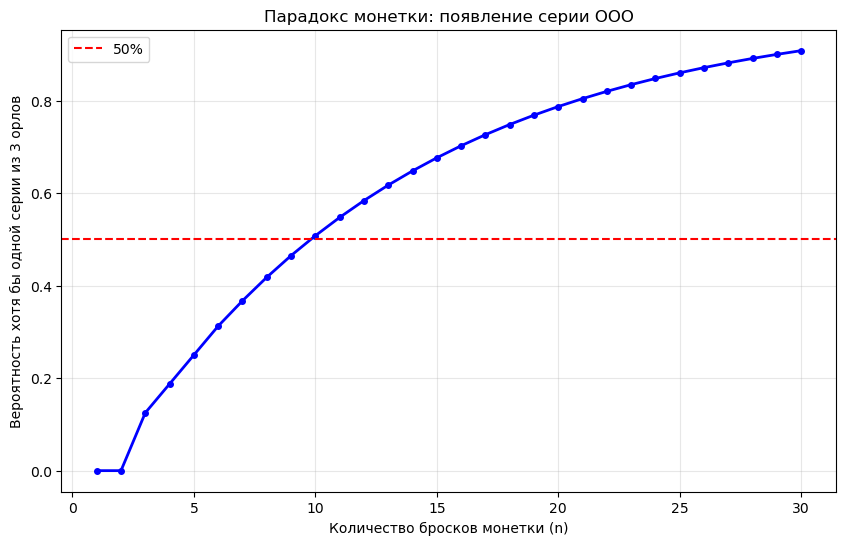

In [15]:
# Моделирование
import numpy as np
import matplotlib.pyplot as plt

def prob_at_least_one_OOO(n):
    if n < 3:
        return 0.0
    a = [0] * (n + 1)
    a[0] = 1  
    if n >= 1:
        a[1] = 2 
    if n >= 2:
        a[2] = 4
    
    for i in range(3, n + 1):
        a[i] = a[i-1] + a[i-2] + a[i-3]
    
    total = 2 ** n
    without_OOO = a[n]
    with_OOO = total - without_OOO
    return with_OOO / total

p10 = prob_at_least_one_OOO(10)
print(f"Вероятность при 10 бросках: {p10:.6f} ≈ {p10*100:.1f}%")

n_vals = np.arange(1, 31)
probs = [prob_at_least_one_OOO(n) for n in n_vals]

plt.figure(figsize=(10, 6))
plt.plot(n_vals, probs, 'b-', linewidth=2, marker='o', markersize=4)
plt.xlabel('Количество бросков монетки (n)')
plt.ylabel('Вероятность хотя бы одной серии из 3 орлов')
plt.title('Парадокс монетки: появление серии OOO')
plt.grid(True, alpha=0.3)

plt.axhline(y=0.5, color='r', linestyle='--', label='50%')
plt.legend()

for n, p in zip(n_vals, probs):
    if p > 0.5:
        print(f"Вероятность > 50% при n = {n} (P = {p:.4f})")
        break

plt.show()

In [14]:
# Математическое решение
import numpy as np
import matplotlib.pyplot as plt
from math import lgamma, log
import pandas as pd

def probability_three_heads(n):
    if n < 3:
        return 0.0
        
    def fib(k):
        a, b = 0, 1
        for _ in range(k):
            a, b = b, a + b
        return a
    
    sequences_without_hhh = fib(n + 2) 
    total_sequences = 2 ** n
    return 1 - sequences_without_hhh / total_sequences

coin = pd.Series(['О', 'Р'])  
series = coin.sample(10, replace=True)

print("Результаты 10 бросков монетки:")
print(series.values)

print("Наличие серии из 3 орлов подряд:")
toss_str = ''.join(series.values)
has_series = 'ООО' in toss_str
print(has_series)

print("Проведение серии из 10000 испытаний") 
results = [('ООО' in ''.join(coin.sample(10, replace=True).values)) for _ in range(10000)]
print("Определение частоты события, когда есть серия из 3 орлов в 10 бросках:")
print(np.mean(results))

print("Определение частоты события, когда есть серия из 3 орлов в 15 бросках:")
results = [('ООО' in ''.join(coin.sample(15, replace=True).values)) for _ in range(10000)]
print(np.mean(results))

Результаты 10 бросков монетки:
['О' 'Р' 'Р' 'О' 'Р' 'Р' 'О' 'О' 'О' 'О']
Наличие серии из 3 орлов подряд:
True
Проведение серии из 10000 испытаний
Определение частоты события, когда есть серия из 3 орлов в 10 бросках:
0.5046
Определение частоты события, когда есть серия из 3 орлов в 15 бросках:
0.6786
